In [77]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, MetaData, inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, Date
from sqlalchemy.ext.automap import automap_base as automap_base_HM
from sqlalchemy.ext.automap import automap_base as automap_base_HS
from sqlalchemy.orm import Session
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Create an engine to database 
engine_HM = create_engine("sqlite:///cleaned_Hawaii_Measurements.sqlite")
#engine_HS = create_engine("sqlite:///cleaned_Hawaii_Stations.sqlite")

In [3]:
conn_HM = engine_HM.connect()
#conn_HS = engine_HS.connect()

In [4]:
#Reflecting into tables:
#Objects inheriting the automap base class
#If only one Base object calls the prepare method for two separate engines, then a SAWarning will be produced
#So we are instantializing two separate objects to workaround it.
Base_HM = automap_base_HM()
#Base_HS = automap_base_HS()


#AutomapBase.prepare() method is called on the object to asking it to reflect the schema and produce mappings
Base_HM.prepare(engine_HM,reflect=True) 
#Base_HS.prepare(engine_HS,reflect=True) 


In [26]:
Base_HM.classes.keys()
HM = Base_HM.classes.Measurement
HM

sqlalchemy.ext.automap.Measurement

In [6]:
measurement = Base_HM.classes.keys()

In [7]:
session = Session(engine_HM)

In [66]:
engine_HM.execute('SELECT date,prcp FROM Measurement WHERE date >= "2016-08-23"').fetchall()

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [68]:
date_prcp = engine_HM.execute('SELECT date,prcp FROM Measurement WHERE date >= "2016-08-23"').fetchall()
dates = []
prcps = []
for i in date_prcp:
    dates.append(i[0])
    prcps.append(i[1])

['2016-08-23',
 '2016-08-24',
 '2016-08-25',
 '2016-08-26',
 '2016-08-27',
 '2016-08-28',
 '2016-08-29',
 '2016-08-30',
 '2016-08-31',
 '2016-09-01',
 '2016-09-02',
 '2016-09-03',
 '2016-09-04',
 '2016-09-05',
 '2016-09-06',
 '2016-09-07',
 '2016-09-08',
 '2016-09-09',
 '2016-09-10',
 '2016-09-11',
 '2016-09-12',
 '2016-09-13',
 '2016-09-14',
 '2016-09-15',
 '2016-09-16',
 '2016-09-17',
 '2016-09-18',
 '2016-09-19',
 '2016-09-20',
 '2016-09-21',
 '2016-09-22',
 '2016-09-23',
 '2016-09-24',
 '2016-09-25',
 '2016-09-26',
 '2016-09-27',
 '2016-09-28',
 '2016-09-29',
 '2016-09-30',
 '2016-10-01',
 '2016-10-02',
 '2016-10-03',
 '2016-10-04',
 '2016-10-05',
 '2016-10-06',
 '2016-10-07',
 '2016-10-08',
 '2016-10-09',
 '2016-10-10',
 '2016-10-11',
 '2016-10-12',
 '2016-10-13',
 '2016-10-14',
 '2016-10-15',
 '2016-10-16',
 '2016-10-17',
 '2016-10-18',
 '2016-10-19',
 '2016-10-20',
 '2016-10-21',
 '2016-10-22',
 '2016-10-23',
 '2016-10-24',
 '2016-10-25',
 '2016-10-26',
 '2016-10-27',
 '2016-10-

In [69]:
analysis_1 = pd.DataFrame({"Dates":dates,"Prcp":prcps})
analysis_1["Prcp"].fillna(value = 0)

0       0.00
1       0.08
2       0.08
3       0.00
4       0.00
5       0.01
6       0.00
7       0.00
8       0.13
9       0.00
10      0.00
11      0.00
12      0.03
13      0.00
14      0.00
15      0.05
16      0.00
17      0.03
18      0.00
19      0.05
20      0.00
21      0.02
22      1.32
23      0.42
24      0.06
25      0.05
26      0.00
27      0.00
28      0.00
29      0.00
        ... 
2200    0.84
2201    0.30
2202    0.30
2203    0.00
2204    0.40
2205    0.30
2206    0.30
2207    0.00
2208    0.00
2209    0.25
2210    0.06
2211    0.00
2212    0.00
2213    0.05
2214    0.34
2215    0.15
2216    0.07
2217    0.00
2218    0.14
2219    0.00
2220    0.22
2221    0.42
2222    0.42
2223    0.13
2224    0.00
2225    0.09
2226    0.00
2227    0.56
2228    0.50
2229    0.45
Name: Prcp, Length: 2230, dtype: float64

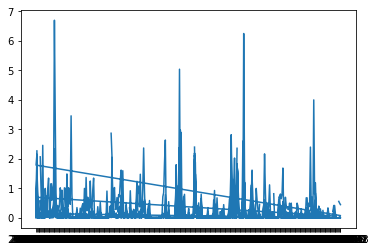

In [80]:
x = analysis_1["Dates"]
y = analysis_1["Prcp"]
plt.plot(x,y)
plt.show()

In [39]:
# qry = session.query(HM).filter(HM.date >= '2010-01-01').all()
# print(qry)

[<sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC0EB70>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC0EDD8>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC0EC88>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC0E978>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC0EBE0>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC0EB00>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC0E588>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC10048>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC101D0>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC10278>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC10320>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC103C8>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC10470>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC10518>, <sqlalchemy.ext.automap.Measurement object at 0x0000018E5DC10

In [35]:
qrys = session.query.\
    filter(HM.date <= '2010-01-01').\
        filter(HM.date >= '2011-01-01').all()
    #group_by(Dow.stock).\
    #order_by(Dow.stock).all()

AttributeError: 'function' object has no attribute 'filter'